In [6]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt

In [3]:
#Load classificationA.train
classificationA_train = np.array(pd.read_csv("classificationA.train", header=None, sep  = "\t"))
classificationA_train_Y = np.copy(classificationA_train[:,2])
classificationA_train_Y = classificationA_train_Y.reshape(classificationA_train_Y.shape[0],1)
classificationA_train_X = np.copy(classificationA_train[:,0:2])

#Load classificationB.train
classificationB_train = np.array(pd.read_csv("classificationB.train", header=None, sep  = "\t"))
classificationB_train_Y = np.copy(classificationB_train[:,2])
classificationB_train_Y = classificationB_train_Y.reshape(classificationB_train_Y.shape[0],1)
classificationB_train_X = np.copy(classificationB_train[:,0:2])
    
#Load classificationC.train
classificationC_train = np.array(pd.read_csv("classificationC.train", header=None, sep  = "\t"))
classificationC_train_Y = np.copy(classificationC_train[:,2])
classificationC_train_Y = classificationC_train_Y.reshape(classificationC_train_Y.shape[0],1)
classificationC_train_X = np.copy(classificationC_train[:,0:2])

#Load classificationA.test
classificationA_test = np.array(pd.read_csv("classificationA.test", header=None, sep  = "\t"))
classificationA_test_Y = np.copy(classificationA_test[:,2])
classificationA_test_Y = classificationA_test_Y.reshape(classificationA_test_Y.shape[0],1)
classificationA_test_X = np.copy(classificationA_test[:,0:2])

#Load classificationB.test
classificationB_test = np.array(pd.read_csv("classificationB.test", header=None, sep  = "\t"))
classificationB_test_Y = np.copy(classificationB_test[:,2])
classificationB_test_Y = classificationB_test_Y.reshape(classificationB_test_Y.shape[0],1)
classificationB_test_X = np.copy(classificationB_test[:,0:2])
    
#Load classificationC.test
classificationC_test = np.array(pd.read_csv("classificationC.test", header=None, sep  = "\t"))
classificationC_test_Y = np.copy(classificationC_test[:,2])
classificationC_test_Y = classificationC_test_Y.reshape(classificationC_test_Y.shape[0],1)
classificationC_test_X = np.copy(classificationC_test[:,0:2])

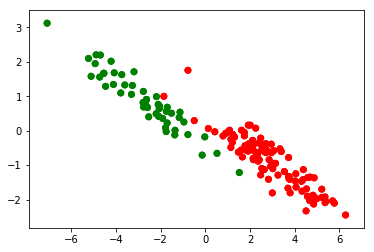

In [9]:
x1 = classificationA_train_X[:,0]
x2 = classificationA_train_X[:,1]
label = classificationA_train_Y
color = ['red' if l == 0 else 'green' for l in label]
plt.scatter(x1, x2, color=color)
plt.show()

In [3]:
N = np.sum(classificationA_train_Y)
n = classificationA_train_Y.shape[0]
w0 = np.zeros([1,2])
w1 = np.zeros([1,2])
for i in range(classificationA_train_Y.shape[0]):
    if classificationA_train_Y[i][0] == 0:
        w0 = w0 + classificationA_train_X[i]
    else:
        w1 = w1 + classificationA_train_X[i]
w0 = w0/(n-N)
w1 = w1/N
Pi = N/n

In [10]:
Sigma = np.zeros([2,2])
for i in range(classificationA_train_Y.shape[0]):
    Sigma = Sigma + (1-classificationA_train_Y[i][0])(classificationA_train_X[i]-w0).transpose().dot(classificationA_train_X[i]-w0)+(classificationA_train_Y[i][0])*(classificationA_train_X[i]-w1).transpose().dot(classificationA_train_X[i]-w1)

TypeError: 'numpy.float64' object is not callable

In [19]:
type(classificationA_train_Y[i][0].astype(int))

numpy.int32

In [20]:
n = classificationA_train_Y[i][0]

In [21]:
type(n)

numpy.float64